<center><img src="images/logo.png" alt="drawing" width="400" style="background-color:white; padding:1em;" /></center> <br/>

# ML through Application
## Module 2, Lab 3: Performing Basic Feature Engineering

Feature engineering is an essential step in ML. Feature engineering involves using domain knowledge to transform raw data into features that an ML algorithm understands better. In this notebook, you will learn common techniques to transform numerical features, encode categorical features, and vectorize processed text features.

You will learn how to do the following:

- Begin data processing.
- Know what feature scaling is and how to use it to improve your model.
- Identify why and how to encode categoricals.
- Perform basic text preprocessing.
- Explain what text vectorization is and how to do it.

----

__Austin Animal Center Dataset__

In this lab, you will work with historical pet adoption data in the [Austin Animal Center Shelter Intakes and Outcomes dataset](https://www.kaggle.com/datasets/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes?resource=download). The target field of the dataset (**Outcome Type**) is the outcome of adoption: 1 for adopted and 0 for not adopted. Multiple features are used in the dataset.

Dataset schema:
- __Pet ID:__ Unique ID of the pet
- __Outcome Type:__ State of pet at the time of recording the outcome (0 = not placed, 1 = placed). This is the field to predict.
- __Sex upon Outcome:__ Sex of pet at outcome
- __Name:__ Name of pet 
- __Found Location:__ Found location of pet before it entered the shelter
- __Intake Type:__ Circumstances that brought the pet to the shelter
- __Intake Condition:__ Health condition of the pet when it entered the shelter
- __Pet Type:__ Type of pet
- __Sex upon Intake:__ Sex of pet when it entered the shelter
- __Breed:__ Breed of pet 
- __Color:__ Color of pet 
- __Age upon Intake Days:__ Age (days) of pet when it entered the shelter
- __Age upon Outcome Days:__ Age (days) of pet at outcome

----

You will be presented with two kinds of exercises throughout the notebook: activities and challenges. <br/>

| <img style="float: center;" src="images/activity.png" alt="Activity" width="125"/>| <img style="float: center;" src="images/challenge.png" alt="Challenge" width="125"/>|
| --- | --- |
|<p style="text-align:center;">No coding is needed for an activity. You try to understand a concept, <br/>answer questions, or run a code cell.</p> |<p style="text-align:center;">Challenges are where you can practice your coding skills.</p>

## Index

- [Data processing](#Data-processing)
- [Feature scaling](#Feature-scaling)
- [Encoding categoricals](#Encoding-categoricals)
- [Text preprocessing](#Text-preprocessing)
- [Text vectorization](#Text-vectorization)

---
## Data processing

First, process the dataset as you did in the previous labs in this module.

In [1]:
%%capture
# Install libraries
!pip install -U -q -r requirements.txt

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Stemmer

%matplotlib inline
from sklearn.impute import SimpleImputer

In [3]:
# Read the dataset into a DataFrame and look at the data
df = pd.read_csv("data/review_dataset.csv")

print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (95485, 13)


In [4]:
# Print the first five rows of the dataset
df.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, use commands that you saw in previous labs to print information about the dataset, including the number of rows, number of columns, and some simple statistics.</p>
    <br>
</div>

In [5]:
############### CODE HERE ###############

df.info()

############## END OF CODE ##############

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB



<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, use the <code>columns</code> function on the DataFrame to print the names of the features to find the numerical subset.</p>
    <br>
</div>

In [6]:
############### CODE HERE ###############

print(df.columns)

############## END OF CODE ##############

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')


In [7]:
# Identify the numerical, categorical, and text features along with the target feature
numerical_features = ["Age upon Intake Days", "Age upon Outcome Days"]

categorical_features = [
    "Sex upon Outcome",
    "Intake Type",
    "Intake Condition",
    "Pet Type",
    "Sex upon Intake",
]

text_features = ["Name", "Found Location", "Breed", "Color"]

model_target = "Outcome Type"

To review the numerical features, use the `value_counts()` function to get a view of the feature values in respective bins.

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64


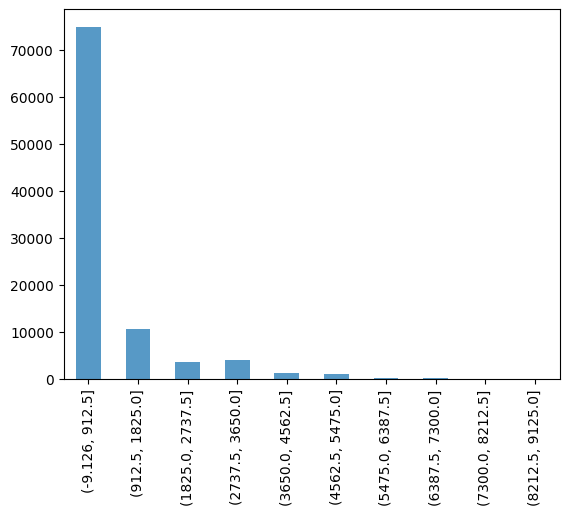

Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Outcome Days, dtype: int64


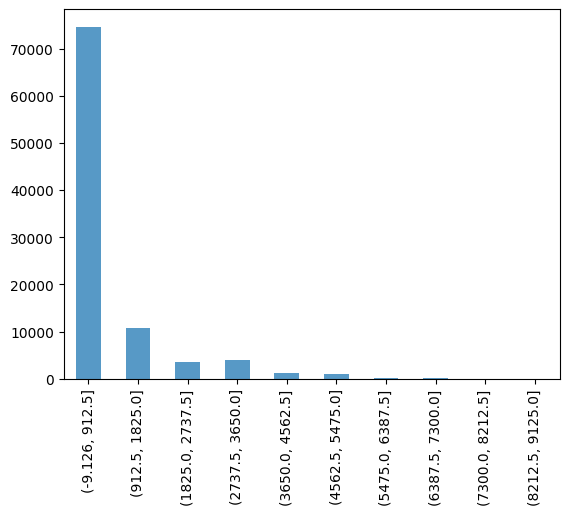

In [8]:
# Print and plot statistics for the numerical features
for c in numerical_features:
    # Print the name of the feature
    print(c)
    # Print the value counts in 10 bins for each feature
    print(df[c].value_counts(bins=10, sort=False))

    # Plot bar charts based on value_counts (alternative plot method)
    df[c].value_counts(bins=10, sort=False).plot(kind="bar", alpha=0.75, rot=90)
    plt.show()

If any outliers are identified as likely wrong values, dropping them could improve the numerical values histograms and overall model performance. One way to remove outliers is to remove any values in the upper 10 percent. 

In [9]:
for c in numerical_features:
    # Drop values beyond 90% of max()
    dropIndexes = df[df[c] > df[c].max() * 9 / 10].index
    df.drop(dropIndexes, inplace=True)


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, print the distribution of numerical features into 10 bins.</p><br>
    <p style=" text-align: center; margin: auto;">Use the <code>value_counts()</code> function to print and plot the data for <i>both</i> numerical features.</p>
    <br>
</div>

Age upon Intake Days
(-6.936, 693.5]     61425
(693.5, 1387.0]     18400
(1387.0, 2080.5]     5657
(2080.5, 2774.0]     3471
(2774.0, 3467.5]     2557
(3467.5, 4161.0]     1962
(4161.0, 4854.5]     1148
(4854.5, 5548.0]      596
(5548.0, 6241.5]      183
(6241.5, 6935.0]       63
Name: Age upon Intake Days, dtype: int64
Age upon Outcome Days
(-6.936, 693.5]     61208
(693.5, 1387.0]     18490
(1387.0, 2080.5]     5643
(2080.5, 2774.0]     3465
(2774.0, 3467.5]     2600
(3467.5, 4161.0]     2004
(4161.0, 4854.5]     1196
(4854.5, 5548.0]      604
(5548.0, 6241.5]      187
(6241.5, 6935.0]       65
Name: Age upon Outcome Days, dtype: int64


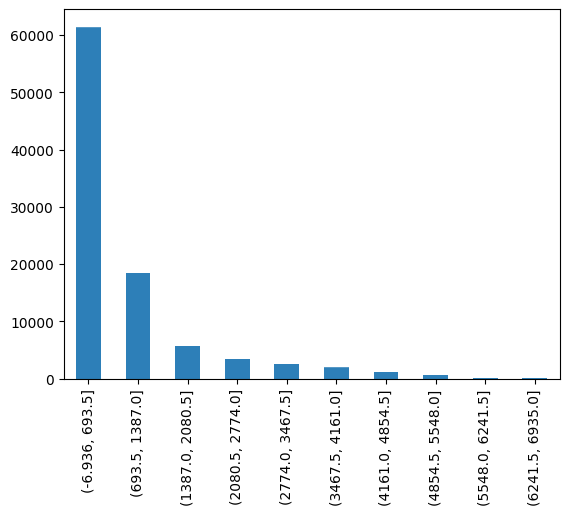

In [10]:
############### CODE HERE ###############

for c in numerical_features:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    df[c].value_counts(bins=10, sort=False).plot(kind='bar',alpha=0.75, rot=90)

############## END OF CODE ##############

### Drop rows with missing values

The simplest way to handle missing data is to drop any row that is missing at least one value. Depending on your data, you might want to use imputation to replace values instead.

In [11]:
# Drop all rows that are missing values
df_missing_dropped = df.dropna()
df_missing_dropped.shape

(59118, 13)

In [12]:
# Checking if missing values were dropped: print the total number of rows for each feature that has missing values
df_missing_dropped.isna().sum()

Pet ID                   0
Outcome Type             0
Sex upon Outcome         0
Name                     0
Found Location           0
Intake Type              0
Intake Condition         0
Pet Type                 0
Sex upon Intake          0
Breed                    0
Color                    0
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64

---
## Feature scaling

Features being on different scales can affect ML algorithms. Feature scaling involves converting all numerical features to the same scale. 

**Particularly, scaling helps the most when multiple features have a range that are much different and don't overlap**. 

In this section, you will use sklearn's `MinMaxScaler` class, which transforms all the numerical features to values within the range of 0 and 1.

In [13]:
# Display the numerical features before feature scaling
df_missing_dropped[numerical_features].head()

,Age upon Intake Days,Age upon Outcome Days
0,730,730
1,365,365
3,60,60
4,7,60
6,2555,2555


In [14]:
# Import the MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
feature_scaler = MinMaxScaler()
scaled_features = feature_scaler.fit_transform(df_missing_dropped[numerical_features])
# Scale the features
df_scaled_numerical_features = pd.DataFrame(scaled_features, columns=numerical_features)

In [15]:
# Display the numerical features after feature scaling
df_scaled_numerical_features.head()

,Age upon Intake Days,Age upon Outcome Days
0,0.105263,0.105263
1,0.052632,0.052632
2,0.008652,0.008652
3,0.001009,0.008652
4,0.368421,0.368421


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [16]:
# Run this cell for a knowledge check question
from MLUMLA_EN_M2_Lab3_quiz_questions import *

question_1

---
## Encoding categoricals

A dataset might contain categorical features, which don't have a natural numerical representation. Most ML algorithms can't work with categorical inputs and require converting them to numerical representations. In this section, you will use sklearn's `OneHotEncoder` class to encode categorical features. 

__Note:__ The `handle_unknown` parameter tells the encoder to ignore (rather than throw an error for) any unique value that might show in the validation or test set but wasn't in the initial training set.

In [17]:
# Show the categorical features before encoding
df_missing_dropped[categorical_features].head()

,Sex upon Outcome,Intake Type,Intake Condition,Pet Type,Sex upon Intake
0,Neutered Male,Owner Surrender,Normal,Cat,Neutered Male
1,Neutered Male,Stray,Normal,Dog,Intact Male
3,Neutered Male,Stray,Normal,Cat,Intact Male
4,Neutered Male,Stray,Nursing,Cat,Intact Male
6,Neutered Male,Stray,Normal,Cat,Neutered Male


In [18]:
# Show the shape of the categorical features in the DataFrame before encoding
df_missing_dropped[categorical_features].shape

(59118, 5)

In [19]:
# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Define the encoder
categorical_encoder = OneHotEncoder(
    handle_unknown="ignore"
)  # handle_unknown tells the function to ignore any value that was not present in the initial training set
encoded_categoricals = categorical_encoder.fit_transform(
    df_missing_dropped[categorical_features]
)

In [20]:
# Show the shape of the categorical features in the DataFrame after encoding
print("The shape of the categorical feature set:", encoded_categoricals.shape)

The shape of the categorical feature set: (59118, 31)


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [21]:
# Run this cell for a knowledge check question
question_2

---
## Text preprocessing

The following are general techniques to clean text features:
- Convert text to lowercase
- Remove leading and trailing white space
- Remove HTML tags and markups
- Remove punctuation
- Remove extra spaces and tabs
- Remove numbers
- Remove stop words
- Stemming

*Stop words* occur frequently in text and don't contribute much to the overall meaning of the sentence. This lab uses the following list of stop words for removal: a, an, the, this, that, is, it, to, and, in.

*Stemming* is a rule-based system to convert a word into its root form. The process removes suffixes from words. This helps to enhance similarities (if any) between sentences. For example:
- jumping, jumped > jump
- cars -> car

In this lab, you will use Stemmer library for stemming.


<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/challenge.png" alt="Challenge" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the following code cell, define a list named <code>stop_words</code> that includes the stop words listed in the previous cell.
    </p>
    <br>
</div>



In [22]:
# Import the required libraries
import re, string

# Define a list with the stop words: a, an, the, this, that, is, it, to, and, in
############### CODE HERE ###############

stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and", "in",]

############## END OF CODE ##############

# Define the stemmer and language to use
stemmer = Stemmer.Stemmer('english')

# Define a function to remove white space, HTML, punctuation, and numbers
def preProcessText(text):
    # Lowercase text, and strip leading and trailing white space
    text = text.lower().strip()

    # Remove HTML tags
    text = re.compile("<.*?>").sub("", text)

    # Remove punctuation
    text = re.compile("[%s]" % re.escape(string.punctuation)).sub(" ", text)

    # Remove extra white space
    text = re.sub("\s+", " ", text)

    # Remove numbers
    text = re.sub(r"[0-9]", "", text)

    return text


# Define a function to remove stop words and stem the words
def lexiconProcess(text, stop_words, stemmer):
    filtered_sentence = []
    words = text.split(" ")
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(stemmer.stemWord(w))
    text = " ".join(filtered_sentence)

    return text


# Define a function to clean a sentence
def cleanSentence(text, stop_words, stemmer):
    return lexiconProcess(preProcessText(text), stop_words, stemmer)

Now that the preprocessing functions have been defined, you will use the `cleanSentence` function on an example.

In [23]:
# Create a variable to use for cleaning
example_text = "   This is a message to be cleaned. 31 It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  "

In [24]:
# Process and clean the example_text
processed_text = cleanSentence(example_text, stop_words, stemmer)

print("Original: " + example_text + "\n")
print("Processed: " + processed_text)

Original:    This is a message to be cleaned. 31 It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  

Processed: messag be clean  may involv some thing like adjac space tab 


Notice that the processed sentence has words such as "messag," "involv," and "adjac," which are not legitimate English words. This is how the stemmer works, which helps the algorithm to understand several words such as "message," "messaging," and "messages" as the same word, "messag."

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [25]:
# Run this cell for a knowledge check question
question_3

---
## Text vectorization

ML models cannot comprehend raw text data and require converting text data into numerical values. The technique for transforming text data into numerical representation is called *text vectorization*.

You will use the *Bag of Words (BoW)* method for text vectorization. This method involves two steps:
1. Create a vocabulary of words across the entire text feature.
2. Measure the presence of the vocabulary words in each sample of the text feature.

For an interactive example of the Bag of Words method, run the following cell.

In [26]:
from mluvisuals import BagOfWords

BagOfWords()

Now, you will use [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), which is the sklearn library's Bag of Words implementation, to perform text vectorization.

In [27]:
# Display the text features before vectorization
df_missing_dropped[text_features].head()

,Name,Found Location,Breed,Color
0,Chunk,Austin (TX),Domestic Shorthair Mix,Brown Tabby/White
1,Gizmo,7201 Levander Loop in Austin (TX),Chihuahua Shorthair Mix,White/Brown
3,*Donatello,2300 Waterway Bnd in Austin (TX),Domestic Shorthair Mix,Black
4,*Zeus,4701 Staggerbrush Rd in Austin (TX),Domestic Shorthair Mix,White/Orange Tabby
6,Artemis,9200 N Plaza Dr in Austin (TX),Domestic Shorthair Mix,Blue/White


In [28]:
# Show the shape of the text features before text vectorization
df_missing_dropped[text_features].shape

(59118, 4)

You will examine one text feature, Found Location, and use the Bag of Words technique to vectorize it.

__Note:__ The process is the same for all features.

In [29]:
# Import the needed classes
from sklearn.feature_extraction.text import CountVectorizer

# Loop through each row of the "Found Location" feature in the DataFrame and
# use the cleaning functions that you defined earlier in this lab
cleaned_text_feature = [
    cleanSentence(item, stop_words, stemmer)
    for item in df_missing_dropped["Found Location"]
]

# Define the count vectorizer
countVectorizer = CountVectorizer(binary=True, max_features=100)

# Vectorize the data
text_feature_vectorized = countVectorizer.fit_transform(cleaned_text_feature)

In [30]:
# Show the shape of the DataFrame after vectorization
text_feature_vectorized.shape

(59118, 100)

The shape of the DataFrame has changed. As expected, it has the same number of rows, but it now has 100 features. This relates directly to the `max_features` flag that was set when you defined the count vectorizer. You can set this number to control the number of features that your model uses to train. This can prevent rare words from having an impact on the model. You will need to adjust this parameter to meet your needs.

The following cell prints the vocabulary created with words across the entire text feature by the vectorization process.

In [31]:
print("Vocabulary: \n", countVectorizer.vocabulary_)

Vocabulary: 
 {'austin': 2, 'tx': 89, 'levand': 47, 'loop': 49, 'rd': 70, 'dr': 31, 'drive': 32, 'street': 84, 'river': 73, 'ct': 26, 'travi': 87, 'ln': 48, 'webbervill': 95, 'road': 75, 'st': 82, 'oak': 58, 'trail': 86, 'old': 60, 'west': 97, 'th': 85, 'parkway': 64, 'fm': 34, 'rundberg': 76, 'lane': 45, 'cross': 25, 'blvd': 9, 'circl': 21, 'manor': 52, 'south': 79, 'meadow': 53, 'springdal': 81, 'outsid': 62, 'jurisdict': 42, 'ave': 3, 'cedar': 17, 'park': 63, 'trl': 88, 'frontier': 36, 'valley': 92, 'manchaca': 51, 'william': 99, 'cannon': 16, 'ih': 40, 'cove': 23, 'del': 29, 'vall': 91, 'dessau': 30, 'avenu': 4, 'spring': 80, 'oltorf': 61, 'pleasant': 68, 'cv': 27, 'highway': 37, 'riversid': 74, 'parmer': 65, 'research': 71, 'metric': 54, 'east': 33, 'cesar': 18, 'chavez': 19, 'vista': 93, 'bend': 6, 'cir': 20, 'hill': 38, 'of': 59, 'lamar': 44, 'leander': 46, 'decker': 28, 'way': 94, 'hwi': 39, 'creek': 24, 'white': 98, 'stassney': 83, 'anderson': 1, 'boulevard': 10, 'airport': 0,

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>It's time to check your knowledge!</i></h3>
    <br>
    <p style=" text-align: center; margin: auto;">To load the question, run the following cell.</p>
    <br>
</div>

In [32]:
# Run this cell for a knowledge check question
question_4

----
## Conclusion

This notebook helped you to understand and manipulate different types of features in a dataset so that you can create the best ML model. Understanding and preparing data is one of the most important steps to build a successful ML model.

## Next lab

In the next lab, you will build a logistic regression model to predict the Outcome Type field of the dataset.